# Two stage neural network implementation for MNIST digits classifier using *Start* 

## Overview

This is a step by step implementation of a multilayer neural network for [MNIST](https://en.wikipedia.org/wiki/MNIST_database) digit classification using *Start*. Input images in MNIST database are 28x28 pixels. Images are black and white so one bit is required to represents each pixel. This neural network classifies input image to one of the possible digits (0-9).

## Importing packages
*Start* and mnist packages are in the src directory. **"*Start* install path"/start/src** directory needs to be in $PYTHONPATH for these packages to load.
* mnist package is used for loading mnist data and other related functions.
* *Start* package that has the components to build a neural network.

In [1]:
import numpy as np
import mnist.utils.load_mnist as load_mnist
import mnist.utils.image as image
import start.neural_network as nn
import start.layer_dict as ld
import start.weight_update_params as wup

## Loading MNIST data
load_mnist function returns training data, validation data and test data as three numpy arrays.
Shape of these arrays is Number of samples * 795.

![title](data_matrix_shape.jpg)

In [2]:
# Load the training, validation and test data
# Each data is a numpy array of shape Number of Samples * 795
# 0:783 are inputs, 784:793 are outputs, 794 is classified output
# N is chose as first dimention as it is easy to shuffle training data
# during training
training_data, validation_data, test_data = load_mnist.load_mnist()

validation_x = np.transpose(validation_data[:, 0:784]) 
validation_y_class = np.transpose(validation_data[:, 794])
val_acc = lambda: net.classification_accuracy(validation_x, validation_y_class)

test_x = np.transpose(test_data[:, 0:784]) 
test_y_class = np.transpose(test_data[:, 794])
test_acc = lambda: net.classification_accuracy(test_x, test_y_class)

##

## Neural Network architecture
The MNIST digit classifier net in this eaxmaple has the following architecture.
![title](mnist_net_arch.jpg)


## Creating the net object
A neural net object is created layer by layer. The first step is to create a net object. Input layer is created automatically when a net is created.


In [3]:
# Create Network - specify input layer neurons (28x28=784)
net = nn.NeuralNetwork("test_net", 784)

## Adding layers
Layers are added sequentially to the net. Last layer added has to be an output layer.

In [4]:
# Fully connected layer of 800 neurons
layer = ld.hdict["fc"](800)
net.add_layer(layer)

# Relu activation layer of 800 neurons
layer = ld.hdict["relu"](800)
net.add_layer(layer)

# Fully connected layer of 80 neurons
layer = ld.hdict["fc"](80)
net.add_layer(layer)

# Fully connected layer of 80 neurons
layer = ld.hdict["relu"](80)
net.add_layer(layer)

# Fully connected layer of 10 neurons
layer = ld.hdict["fc"](10)
net.add_layer(layer)

# Add softmax output layer
layer = ld.odict["softmax"](10)
net.add_layer(layer)

## Check the network architecture

In [5]:
net.check_arch()

## Specify L2 loss coeffcient

In [6]:
# Specify l2 loss
net.set_l2_loss_coeff(.001)

## Set weight update method

In [7]:
# Define weight update method
params = wup.GradientDescentParams(.3)
# params = wup.MomentumParams(.3)
# params = wup.AdamParams()
net.set_weight_update_function(params)

## Initialize the network

In [8]:
# For repeatability of results published below
np.random.seed(1)
# Initialize the network
net.initialize_parameters()

## Train the network

In [10]:
# Set training related parameters
mini_batch_size = 32
epochs = 20
verbose = 0

# Train the network
for epoch in range(1, epochs+1):
    print("Epoch " + str(epoch))
    np.random.shuffle(training_data)
    mini_batches = [training_data[k:k + mini_batch_size, :] for k in
                   range(0, len(training_data), mini_batch_size)]
    for count, mini_batch in enumerate(mini_batches, start=1):
        x = np.transpose(mini_batch[:, 0:784])
        y = np.transpose(mini_batch[:, 784:794])
        net.train(x, y)
        if ((count%100 == 0) and verbose):
            print("Count {0} validation data accuracy = {1} %.".format(count, val_acc()))
            print()
            
        
    print("Epoch {0} validation data accuracy = {1} %.".format(epoch, val_acc()))
    print()


Epoch 1
Epoch 1 validation data accuracy = 98.39 %.

Epoch 2
Epoch 2 validation data accuracy = 98.42 %.

Epoch 3
Epoch 3 validation data accuracy = 98.42 %.

Epoch 4
Epoch 4 validation data accuracy = 98.41 %.

Epoch 5
Epoch 5 validation data accuracy = 98.42 %.

Epoch 6
Epoch 6 validation data accuracy = 98.44 %.

Epoch 7
Epoch 7 validation data accuracy = 98.45 %.

Epoch 8
Epoch 8 validation data accuracy = 98.49 %.

Epoch 9
Epoch 9 validation data accuracy = 98.43 %.

Epoch 10
Epoch 10 validation data accuracy = 98.46 %.

Epoch 11
Epoch 11 validation data accuracy = 98.5 %.

Epoch 12
Epoch 12 validation data accuracy = 98.46 %.

Epoch 13
Epoch 13 validation data accuracy = 98.46 %.

Epoch 14
Epoch 14 validation data accuracy = 98.46 %.

Epoch 15
Epoch 15 validation data accuracy = 98.48 %.

Epoch 16
Epoch 16 validation data accuracy = 98.48 %.

Epoch 17
Epoch 17 validation data accuracy = 98.46 %.

Epoch 18
Epoch 18 validation data accuracy = 98.44 %.

Epoch 19
Epoch 19 validation 

## Test data accuracy

In [11]:
print("Test data accuracy = {0} %.".format(test_acc()))
print()

Test data accuracy = 98.58 %.



# Analyzing results

## collecting error cases
Get the classfied and raw predicted outputs for the test data.

In [12]:
pred_y_class = net.predict_classify(test_x)
pred_y = net.predict(test_x)

# create a error dictionary

In [13]:
class errCase(object):
    def __init__(self, index, x, y, pred_y):
        self.index = index
        self.x = x
        self.img = x.reshape(28, 28)
        self.y = int(y)
        self.pred_y = pred_y
    
    def show(self):
        image.show(self.img)

errDict = {}
for i in range(pred_y_class.shape[0]):
  if (pred_y_class[i] != test_y_class[i]):
    errDict[i] = errCase(i, test_x[:, i], test_y_class[i], pred_y_class[i]) 


# analyze the error cases
Show the images for the failing samples. Also print the raw output for the label and predicted values. This gives an idea of the relative confidence.

Training data index =  8
Labeled class = 5 : Predicted class = 6
Predicted class output =  0.759254096927
Labeled class output =  0.240472638995



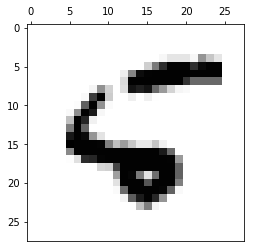

--------------------------------
Training data index =  247
Labeled class = 4 : Predicted class = 2
Predicted class output =  0.971831804776
Labeled class output =  3.53346031838e-05



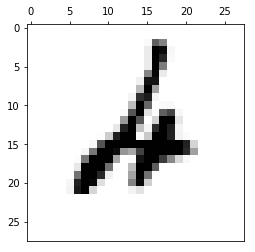

--------------------------------
Training data index =  321
Labeled class = 2 : Predicted class = 7
Predicted class output =  0.991192982347
Labeled class output =  0.00845406938311



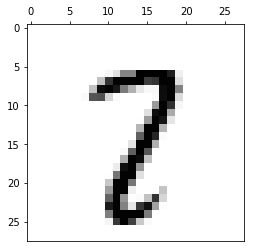

--------------------------------
Training data index =  340
Labeled class = 5 : Predicted class = 3
Predicted class output =  0.954069838963
Labeled class output =  0.0459289402508



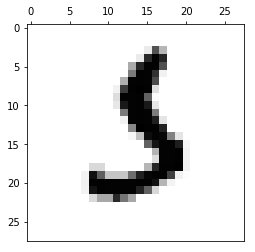

--------------------------------
Training data index =  381
Labeled class = 3 : Predicted class = 7
Predicted class output =  0.566708512933
Labeled class output =  0.429318987097



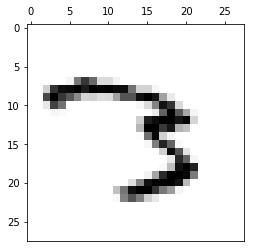

--------------------------------


In [15]:
showErrors = 5
for error in errDict.values():
    print ("Training data index = ", str(error.index))
    print ("Labeled class = {0} : Predicted class = {1}".format(error.y, error.pred_y))
    print ("Predicted class output = ", str(pred_y[error.pred_y][error.index]))
    print ("Labeled class output = ", str(pred_y[error.y][error.index]))
    print()
    error.show()
    print ("--------------------------------")
    showErrors -= 1
    if (showErrors == 0):
        break
    

## Error matrix
Draw a matrix that plots a heat map of errors.

In [16]:
errGrid = [[0 for col in range(10)] for row in range(10)]
for i in range(pred_y_class.shape[0]):
    errGrid[int(test_y_class[i])][pred_y_class[i]] += 1

for i in range(10):
    errGrid[i][i] = 0

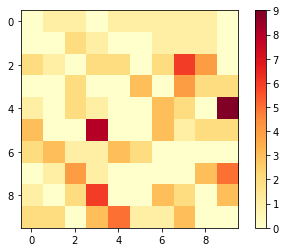

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(errGrid, interpolation='nearest', cmap=plt.cm.YlOrRd)
plt.colorbar()
plt.show()